In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from datetime import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
import math


In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:/Users/tmutengwa/Documents/Acadgild/DataSources')

In [33]:
data = pd.read_csv('data_stocks.csv')

In [34]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [35]:
data.DATE = data.DATE.apply(lambda x: datetime.fromtimestamp(x))
#data.DATE = data.DATE.apply(pd.to_datetime, unit = 's')
data.DATE

0       2017-04-03 15:30:00
1       2017-04-03 15:31:00
2       2017-04-03 15:32:00
3       2017-04-03 15:33:00
4       2017-04-03 15:34:00
                ...        
41261   2017-08-31 21:56:00
41262   2017-08-31 21:57:00
41263   2017-08-31 21:58:00
41264   2017-08-31 21:59:00
41265   2017-08-31 22:00:00
Name: DATE, Length: 41266, dtype: datetime64[ns]

In [36]:
data.head(392)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 15:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.7600,121.52,...,84.370,119.035,44.40,39.88,82.030,7.360,50.220,63.86,122.000,53.350
1,2017-04-03 15:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.8400,121.48,...,84.370,119.035,44.11,39.88,82.030,7.380,50.220,63.74,121.770,53.350
2,2017-04-03 15:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.7950,121.93,...,84.585,119.260,44.09,39.98,82.020,7.360,50.120,63.75,121.700,53.365
3,2017-04-03 15:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.6200,121.44,...,84.460,119.260,44.25,39.99,82.020,7.350,50.160,63.88,121.700,53.380
4,2017-04-03 15:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.6200,121.60,...,84.470,119.610,44.11,39.96,82.030,7.360,50.200,63.91,121.695,53.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2017-04-03 21:57:00,2358.9099,42.4650,143.7754,129.6700,81.250,101.3400,85.4400,58.1050,119.39,...,83.940,118.180,44.33,39.38,82.035,7.255,49.355,63.57,121.350,53.200
388,2017-04-03 21:58:00,2358.8999,42.5000,143.7500,129.6300,81.225,101.3100,85.4050,58.1200,119.24,...,83.960,118.160,44.37,39.38,82.060,7.255,49.380,63.56,121.320,53.170
389,2017-04-03 21:59:00,2358.9600,42.5000,143.7750,129.6200,81.225,101.2900,85.3600,58.0801,119.29,...,83.970,118.160,44.39,39.38,82.050,7.255,49.365,63.56,121.320,53.175
390,2017-04-03 22:00:00,2358.9600,42.4800,143.7000,129.6200,81.220,101.2700,85.3900,58.1000,119.28,...,84.010,118.110,44.39,39.39,82.080,7.250,49.430,63.55,121.350,53.175


In [37]:
companies = data.columns[2:].str.split('.').str[1]

In [38]:
companies

Index(['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT',
       'AMD',
       ...
       'WYN', 'XEC', 'XEL', 'XL', 'XOM', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZTS'],
      dtype='object', length=500)

In [39]:
data.rename(columns = dict(zip(data.columns[2:], companies)), inplace = True)

In [40]:
data.head()

,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,2017-04-03 15:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 15:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 15:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 15:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 15:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [41]:
data['DATE'] = data['DATE'].apply(lambda x:x.date())
data['DATE']=data['DATE']. apply(pd.to_datetime); data.DATE.dtype

dtype('<M8[ns]')

In [44]:
data.head()

,DATE,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,2017-04-03,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [45]:
closing_price = data.drop_duplicates('DATE', keep ='last')


In [46]:
closing_price.shape

(106, 502)

In [47]:
closing_price.set_index('DATE', inplace = True)

In [48]:
closing_price.head()

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,2358.9600,42.48,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,2359.9600,40.90,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,2352.8401,41.31,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,2357.6699,41.72,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,2355.6899,41.81,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [54]:
AAPL_df = closing_price['AAPL']

In [55]:
AAPL_df.head()

DATE
2017-04-03    143.700
2017-04-04    144.770
2017-04-05    144.020
2017-04-06    143.685
2017-04-07    143.340
Name: AAPL, dtype: float64

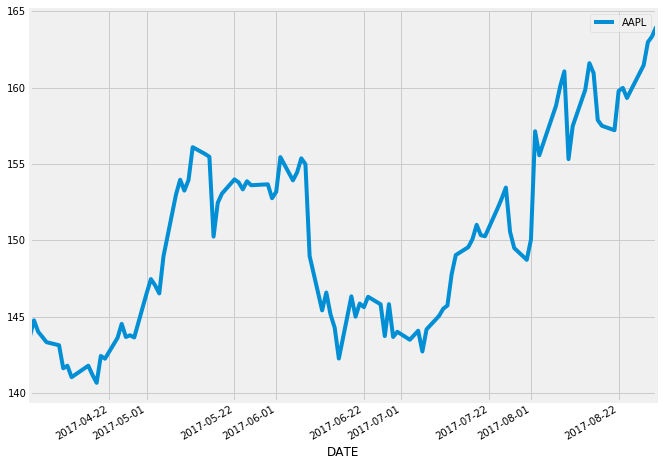

In [58]:
AAPL_df.plot(figsize =(10,8))
plt.legend()
plt.show()

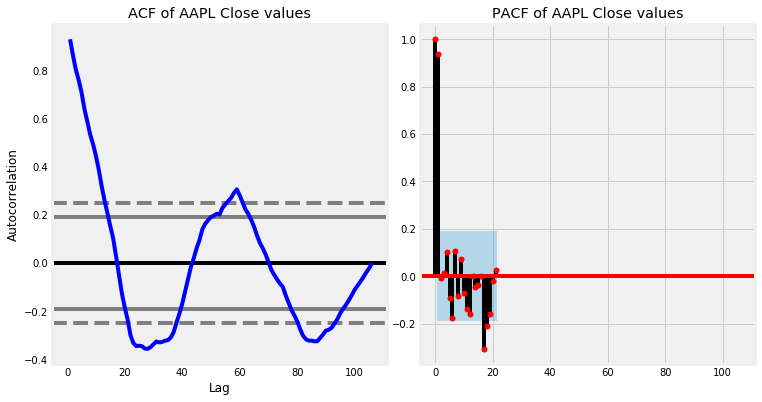

In [85]:
#Let us plot the ACFs of original time series and first-differences
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.set_size_inches(10.5, 5.5)
autocorrelation_plot(AAPL_df, color='b', ax=ax1)
ax1.set_title('ACF of AAPL Close values')

plot_pacf(AAPL_df, color='r', ax=ax2)
ax2.set_title('PACF of AAPL Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

The partial autocorrelation graph above indicates that the value on lag 1 is the one which is significantly different from 0, so a model AR(1) should work.

In [ ]:
'''
Testing for Stationarity using  Augmented Dickey Fuller (ADF) test

Null Hypothesis (H0): The time series has a unit root, meaning it is non-stationary.
It has some time dependent structure.
Alternate Hypothesis (H1): The time series does not have a unit root, meaning it is stationary. 
It does not have time-dependent structure.

'''

In [66]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic',
                                                       'P-Value',
                                                       '# Lags Used',
                                                       '# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)       
        


In [67]:
result = StationarityTests()
result.ADF_Stationarity_Test(AAPL_df, printResults = True)
print("Is the time series stationary? {0}".format(result.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -0.754829
P-Value                  0.832032
# Lags Used              6.000000
# Observations Used     99.000000
Critical Value (1%)     -3.498198
Critical Value (5%)     -2.891208
Critical Value (10%)    -2.582596
dtype: float64
Is the time series stationary? False


Series is non stationary

In [76]:
AAPL_df.loc[AAPL_df.index > '2017-07-31'].count()

23

In [112]:
forecast_out = 23
split = len(AAPL_df)- forecast_out
train, test = AAPL_df[:split], AAPL_df[split:]
X = np.array(train)
y = np.array(test)
display(X)
display(y)
type(forecast_out)
type(test)

array([143.7   , 144.77  , 144.02  , 143.685 , 143.34  , 143.14  ,
       141.63  , 141.8   , 141.05  , 141.8   , 141.2   , 140.68  ,
       142.44  , 142.26  , 143.62  , 144.54  , 143.68  , 143.79  ,
       143.65  , 146.57  , 147.47  , 147.06  , 146.53  , 148.9508,
       153.    , 153.97  , 153.26  , 153.95  , 156.1   , 155.65  ,
       155.47  , 150.25  , 152.46  , 153.06  , 153.99  , 153.8   ,
       153.34  , 153.87  , 153.61  , 153.67  , 152.76  , 153.18  ,
       155.45  , 153.93  , 154.45  , 155.37  , 154.99  , 148.98  ,
       145.42  , 146.59  , 145.16  , 144.29  , 142.27  , 146.34  ,
       145.01  , 145.87  , 145.63  , 146.31  , 145.82  , 143.74  ,
       145.83  , 143.68  , 144.02  , 143.5   , 144.09  , 142.73  ,
       144.18  , 145.06  , 145.53  , 145.74  , 147.77  , 149.04  ,
       149.56  , 150.08  , 151.02  , 150.34  , 150.27  , 152.09  ,
       152.74  , 153.46  , 150.56  , 149.5   , 148.73  ])

array([150.05, 157.14, 155.57, 156.39, 158.81, 160.08, 161.06, 155.32,
       157.48, 159.85, 161.6 , 160.95, 157.87, 157.5 , 157.21, 159.78,
       159.98, 159.32, 159.86, 161.47, 162.97, 163.35, 163.98])

pandas.core.series.Series

In [81]:
symbol_diff = train - train.shift()
symbol_diff = symbol_diff.dropna()
symbol_diff.head()

DATE
2017-04-04    1.070
2017-04-05   -0.750
2017-04-06   -0.335
2017-04-07   -0.345
2017-04-10   -0.200
Name: AAPL, dtype: float64

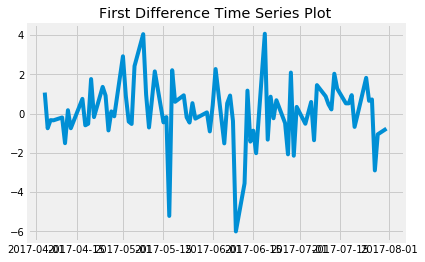

In [82]:
plt.plot(symbol_diff)
plt.title('First Difference Time Series Plot')
plt.show()

In [108]:
order = (1, 1, 1)

mod = ARIMA(train, order = order)

results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.AAPL   No. Observations:                   82
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -155.374
Method:                       css-mle   S.D. of innovations              1.609
Date:                Mon, 09 Dec 2019   AIC                            318.748
Time:                        23:42:31   BIC                            328.375
Sample:                             1   HQIC                           322.613
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0613      0.174      0.352      0.726      -0.281       0.403
ar.L1.D.AAPL    -0.6623      0.451     -1.470      0.146      -1.545       0.221
ma.L1.D.AAPL     0.6311      0.459      1.37

In [98]:
order = (3,2,1)
mod = ARIMA(X, order = order)

results_2 = mod.fit()
print(results_2.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   81
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -155.762
Method:                       css-mle   S.D. of innovations              1.642
Date:                Mon, 09 Dec 2019   AIC                            323.523
Time:                        23:34:48   BIC                            337.890
Sample:                             2   HQIC                           329.287
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.054     -0.194      0.846      -0.116       0.095
ar.L1.D2.y    -0.5285      0.213     -2.485      0.015      -0.945      -0.112
ar.L2.D2.y    -0.4263      0.168     -2.530      0.0

In [103]:
test.index[0]

Timestamp('2017-08-01 00:00:00')

In [104]:
test.index[-1]

Timestamp('2017-08-31 00:00:00')

In [113]:
prediction = results.predict(test, typ='levels')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

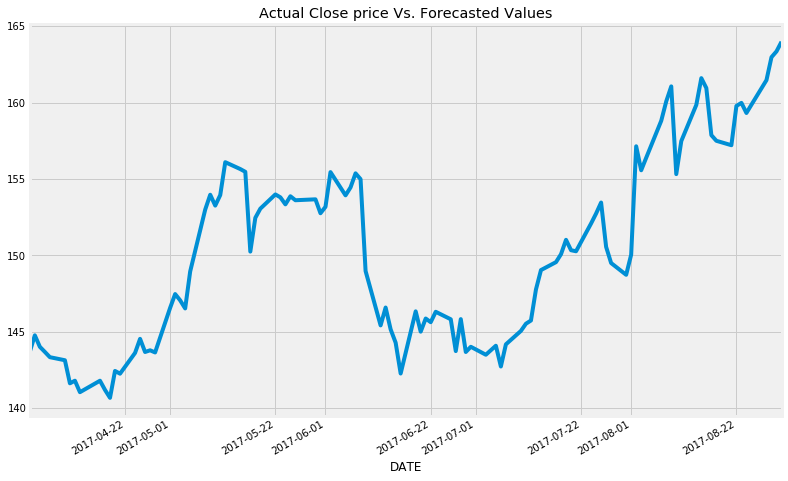

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Actual Close price Vs. Forecasted Values")
ax = AAPL_df.ix[len(AAPL_df)-forecast_out*10:].plot(ax=ax)
fig = results.plot_predict(test.index[0],
                           test.index[-1],
                           dynamic=True,
                           ax=ax,
                           plot_insample=False)
legend = ax.legend(loc='upper left')

In [116]:
mean_forecast_error = AAPL_df.ix[-forecast_out:].sub(prediction).mean()
print('Mean forecast error is {:.2%}'.format(abs(mean_forecast_error)))

NameError: name 'prediction' is not defined

In [117]:
naive_prediction = original_data.tail(predict_days+1).shift(1).tail(predict_days)
percentage_change = abs((prediction/naive_prediction-1) *100)
df = pd.concat([naive_prediction, prediction, percentage_change], axis=1)
df.columns = ['Original', 'Predicted', '% Prediction Diff']
df

NameError: name 'original_data' is not defined

In [118]:
mean_errors = []
for number_of_days in range(1, 20):
    split = len(original_data) - number_of_days
    train_data, prediction_data = original_data[0:split], original_data[split:]
    mod = ARIMA(train_data, order = (1, 1, 1), freq = 'D')
    results = mod.fit(disp=0)
    prediction = results.predict(prediction_data.index[0],
                                 prediction_data.index[-1],
                                 typ='levels')
    original_data_sample = original_data.ix[-number_of_days:]
    mean_errors.append(abs(original_data_sample.sub(prediction).mean()))

plt.plot(mean_errors)
plt.show()


NameError: name 'original_data' is not defined

In [119]:
symbols = ['MSFT', 'NVDA', 'CSCO', 'ORCL', 'SYMC', 'INTC', 'EBAY', 'YHOO']
mean_errors = []

for symbol in symbols: # this can be improved with multiprocessing or async calls
    data = web.DataReader(symbol, source, start, end)
    original_data = data.fillna(method='ffill')

    ran = pd.date_range(start_date, end_date, freq = 'D')
    original_data = pd.Series(original_data['Close'], index = ran)

    original_data = original_data.fillna(method='ffill')

    split = len(original_data) - predict_days
    train_data, prediction_data = original_data[0:split], original_data[split:]
    mod = ARIMA(train_data, order = (1, 1, 1), freq = 'D')
    results = mod.fit(disp=0)
    prediction = results.predict(prediction_data.index[0],
                                 prediction_data.index[-1],
                                 typ='levels')
    original_data_sample = original_data.ix[-number_of_days:]
    mean_errors.append(abs(original_data_sample.sub(prediction).mean()))


NameError: name 'web' is not defined

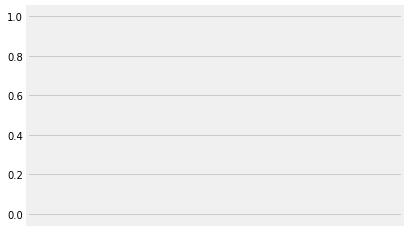

In [120]:
N = len(mean_errors)
x = range(N)
width = 1/1.5
plt.bar(x, mean_errors, width, color="blue")
plt.xticks(x, symbols)
plt.show()